In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder

ruta_csv = 'combined_statistics_full_sobregrupos.csv'
df = pd.read_csv(ruta_csv)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.model_selection import GridSearchCV

svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

svc = SVC()

# GridSearch para SVC
grid_svc = GridSearchCV(
    estimator=svc,
    param_grid=svc_params,
    cv=5,
    scoring='accuracy',
    verbose=1
)

print("Ajustando SVC...")
grid_svc.fit(X_train_scaled, y_train)

print(f"Mejores hiperparámetros SVC: {grid_svc.best_params_}")
print(f"Mejor precisión SVC: {grid_svc.best_score_:.4f}")

Ajustando SVC...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros SVC: {'C': 100, 'gamma': 0.01}
Mejor precisión SVC: 0.9718


In [2]:
svm_basic = SVC(kernel='linear', probability=True, random_state=42, C=100, gamma=0.01)
svm_basic.fit(X_train_scaled, y_train)

print("\nModel Information:")
print(f"Number of support vectors: {len(svm_basic.support_vectors_)}")
print("Support vectors per class:", dict(zip(['No Survived', 'Survived'],
                                             svm_basic.n_support_)))
print(f"Training accuracy: {svm_basic.score(X_train_scaled, y_train):.3f}")
print(f"Test accuracy: {svm_basic.score(X_test_scaled, y_test):.3f}")
coef_svc = svm_basic.coef_

for feature, coef_value in zip(X.columns, coef_svc[0]):
    print(f"Variable: {feature}, Coeficiente: {coef_value}")



Model Information:
Number of support vectors: 280
Support vectors per class: {'No Survived': np.int32(48), 'Survived': np.int32(42)}
Training accuracy: 1.000
Test accuracy: 0.934
Variable: tachometer_mean, Coeficiente: 0.004603720315170534
Variable: tachometer_median, Coeficiente: -0.05688288690757304
Variable: tachometer_std, Coeficiente: 0.12826425985994838
Variable: tachometer_variance, Coeficiente: 0.015146172443916583
Variable: tachometer_range, Coeficiente: -0.11048223535278856
Variable: tachometer_skewness, Coeficiente: -0.27471170685465474
Variable: tachometer_kurtosis, Coeficiente: -0.623984458104637
Variable: tachometer_dominant_frequency, Coeficiente: -0.13788478186958741
Variable: acc_under_axial_mean, Coeficiente: 0.07164330612751257
Variable: acc_under_axial_median, Coeficiente: -0.28176230735841745
Variable: acc_under_axial_std, Coeficiente: -0.13912281876280375
Variable: acc_under_axial_variance, Coeficiente: -0.023103669665781368
Variable: acc_under_axial_range, Coefi

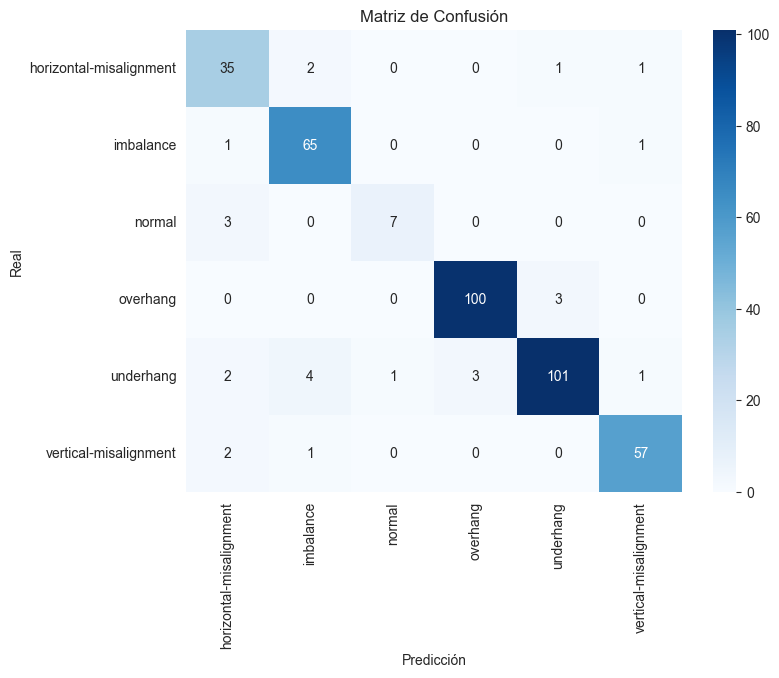

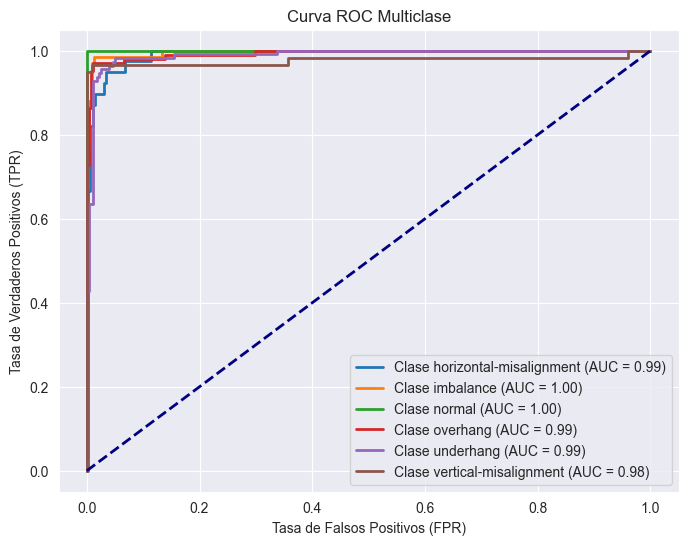

In [4]:
svm_test_pred = svm_basic.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, svm_test_pred)

classes = sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=classes)
rf_test_prob = svm_basic.predict_proba(X_test_scaled)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], rf_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc='lower right')
plt.show()
